In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [5]:
# Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [6]:
model = Sequential()

In [7]:
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
Base_Model = model.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 3s 269us/step - loss: 0.8312 - accuracy: 0.7367 - val_loss: 0.6726 - val_accuracy: 0.7624
Epoch 2/20
12660/12660 [==============================] - 3s 248us/step - loss: 0.3804 - accuracy: 0.8731 - val_loss: 0.5159 - val_accuracy: 0.8420
Epoch 3/20
12660/12660 [==============================] - 3s 248us/step - loss: 0.2857 - accuracy: 0.9076 - val_loss: 0.4944 - val_accuracy: 0.8631
Epoch 4/20
12660/12660 [==============================] - 3s 242us/step - loss: 0.2469 - accuracy: 0.9184 - val_loss: 0.5742 - val_accuracy: 0.8592
Epoch 5/20
12660/12660 [==============================] - 3s 244us/step - loss: 0.1970 - accuracy: 0.9397 - val_loss: 0.4381 - val_accuracy: 0.8990
Epoch 6/20
12660/12660 [==============================] - 3s 242us/step - loss: 0.1513 - accuracy: 0.9498 - val_loss: 0.3433 - val_accuracy: 0.9249
Epoch 7/20
12660/12660 [==============================] - 3s 24

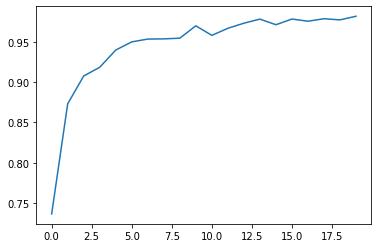

In [11]:
plt.plot(Base_Model.history['accuracy'])

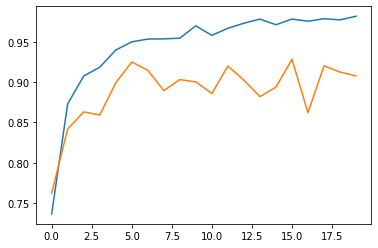

In [13]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])

In [14]:
score = model.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 98us/step


In [30]:
score

[0.48275352509187563, 0.9076738357543945]

In [52]:
predictions = model.predict_classes(x_test, batch_size=10)

In [48]:
rounded_labels=np.argmax(y_test, axis=1)

In [49]:
cm = confusion_matrix(rounded_labels, predictions)

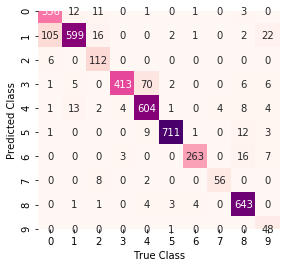

In [50]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [64]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       450
           1       0.80      0.95      0.87       630
           2       0.95      0.75      0.84       150
           3       0.82      0.98      0.89       420
           4       0.94      0.88      0.91       690
           5       0.96      0.99      0.98       720
           6       0.91      0.97      0.94       270
           7       0.85      0.93      0.89        60
           8       0.98      0.93      0.96       690
           9       0.98      0.53      0.69        90

    accuracy                           0.91      4170
   macro avg       0.91      0.87      0.88      4170
weighted avg       0.91      0.91      0.91      4170



In [21]:
def construct_new_model():
    model = Sequential()
    # Dense Adds fully connected nodes in each layer 

    # Input layer is the number of pixels & their values 

    # Layer 1
    model.add(Dense(512, activation = 'relu',input_shape=(784,)))

    # Layer 2
    model.add(Dense(512, activation = 'relu'))    
    
    # Layer 3
    model.add(Dense(512, activation = 'relu'))
    
    # Layer 4
    model.add(Dense(512, activation = 'relu'))
    
    #Output Layer
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [22]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [23]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))
    return model.evaluate(x_test, y_test)

In [24]:
def get_network_output(model, x_train, x_test, y_train, y_test):
    x = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))
    return x

In [25]:
ScoreArray = []

In [26]:
for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train.argmax(1))):
    x_train_kf, x_test_kf = x_train[train_index], x_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    ScoreArray.append(get_score(construct_new_model(), x_train_kf, x_test_kf, y_train_kf, y_test_kf))

Train on 11394 samples, validate on 1266 samples
Epoch 1/5
11394/11394 [==============================] - 5s 412us/step - loss: 0.9474 - accuracy: 0.6727 - val_loss: 0.5547 - val_accuracy: 0.7978
Epoch 2/5
11394/11394 [==============================] - 4s 381us/step - loss: 0.4054 - accuracy: 0.8509 - val_loss: 0.3126 - val_accuracy: 0.8949
Epoch 3/5
11394/11394 [==============================] - 4s 380us/step - loss: 0.3147 - accuracy: 0.8851 - val_loss: 0.8076 - val_accuracy: 0.7725
Epoch 4/5
11394/11394 [==============================] - 5s 399us/step - loss: 0.2796 - accuracy: 0.8998 - val_loss: 0.2021 - val_accuracy: 0.9258
Epoch 5/5
1266/1266 [==============================] - 0s 104us/step
Train on 11394 samples, validate on 1266 samples
Epoch 1/5
11394/11394 [==============================] - 5s 416us/step - loss: 0.8988 - accuracy: 0.6913 - val_loss: 0.6136 - val_accuracy: 0.7670
Epoch 2/5
11394/11394 [==============================] - 4s 389us/step - loss: 0.3925 - accuracy: 

In [27]:
ScoreArray = np.array(ScoreArray)
ScoreArray[:,1:2]

array([[0.92180097],
       [0.87914693],
       [0.93917853],
       [0.91074252],
       [0.93996841],
       [0.92969984],
       [0.89810425],
       [0.88230646],
       [0.87440759],
       [0.92890996]])

In [28]:
print(np.mean(ScoreArray[:,1:2]))

0.9104265451431275
